In [1]:
import numpy as np
import matplotlib.pyplot as plt

orr = np.genfromtxt('../initial/Random_Data_Pattern.txt', delimiter=',')
file0 = np.genfromtxt('./Chip_3D_3_Block223_Feb12_RandomData_ReadRetry_SetFeature_0.txt', delimiter=',')
file1 = np.genfromtxt('./Read3D_chip3_blk223_20krad.txt', delimiter=',')

original = orr[:,1:]
relaxed_data = file0[:,1:]
radiated_data = file1[:,1:]


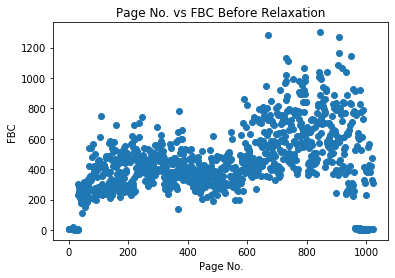

Corruption rate of  2.4 %


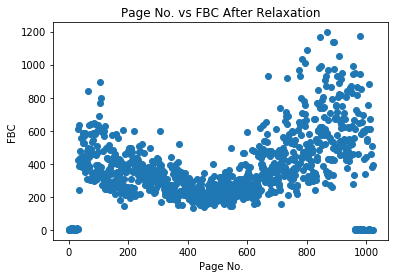

Corruption rate of  2.0 %


In [41]:
datas = [radiated_data, relaxed_data] 
aa = ["Before", "After"]
def fbc():
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((2,n))
    ms = np.zeros((2,n))
    lsb, msb = 0,0
    count = 0
    count0 = 0
    f = np.zeros((2,n))
    k =0
    for data in datas:
        for i in range(0, n):
            for j in range(0, m):
                if(original[i][j] != data[i][j]):
                    count += 1
                    count0 += 1
            if count < 1500:
                corr[1][i] = count
            corr[0][i]= i
            count = 0
            if(i == n-1):
                corrp = corr
                plt.figure()
                plt.scatter(corrp[0],corrp[1])
                plt.xlabel("Page No.")
                plt.ylabel("FBC")
                plt.title("Page No. vs FBC "+str(aa[k])+" Relaxation")
                plt.show()
        f[k] = corr[1]    
        k+=1
        print("Corruption rate of ", round(100*count0/(n*m),2),"%")
        count0 =0
    return f

                
total_before = fbc()

Average FBC for LSB and MSB being corrupted together 0.0


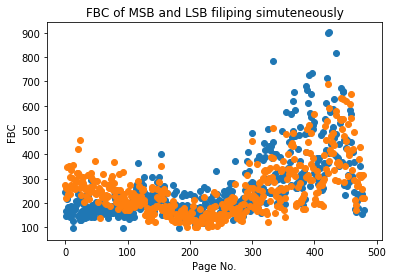

0 0


In [25]:
def Convert_Byte_to_Bit(data_byte):
    num_of_bits=8;
    data_bit=[];

    bit_bin=bin(data_byte)[2:].zfill(num_of_bits)
    for j in range(0, len(bit_bin),1):
        data_bit.append(bit_bin[j]);
    return list(map(int, data_bit));

def shift_pages():
    n = len(original[:,1])
    m = len(original[1,:])
    c = list(range(32, 64)) + [num for num in range(65,960) if num % 2 == 1]
    d = [num for num in range(64,1023) if num % 2 == 0]
    lb = len(d) #((n+1)-64)/2
    pages_fail = np.zeros((2,lb))
    pages_ = np.zeros((3,lb))
    fbc = 0
    msbs, lsbs = 0, 0
#     for data in datas:
    for i in range(0,lb):
#         print(c[i], d[i])
        for j in range(0,m):
            lsb = Convert_Byte_to_Bit(int(original[d[i]][j]))
            msb = Convert_Byte_to_Bit(int(original[c[i]][j]))
            lsb_cor = Convert_Byte_to_Bit(int(radiated_data[d[i]][j]))
            msb_cor = Convert_Byte_to_Bit(int(radiated_data[c[i]][j]))
            lsb_rel = Convert_Byte_to_Bit(int(relaxed_data[d[i]][j]))
            msb_rel = Convert_Byte_to_Bit(int(relaxed_data[c[i]][j]))
#             if ((original[i][j] != radiated_data[i][j]) 
#                 and (original[i][j] != relaxed_data[i][j])):
            for xx in range(0,len(lsb)):
                if ((lsb[xx] != lsb_cor[xx]) and (lsb[xx] != lsb_rel[xx])):
#                     if (lsb[xx] != 0) and (lsb_rel[xx] == 1):
#                         or ((lsb[xx] == lsb_cor[xx]) and (lsb[xx] != lsb_rel[xx]))):
                        lsbs += 1
#                     else:
                if ((msb[xx] != msb_cor[xx]) and (msb[xx] != msb_rel[xx])):
                        msbs += 1
                
#                     print(lsb[xx], lsb_rel[xx])
#                 if ((((msb[xx] != msb_cor[xx]) and (msb[xx] == msb_rel[xx])))
#                     and ((msb[xx] != 0) and (msb_rel[xx] == 1))):
# #                         or ((msb[xx] == msb_cor[xx]) and (msb[xx] != msb_rel[xx]))):
#                     msbs += 1
                
#                     print(lsb[xx], lsb_rel[xx])
#                 if ((lsb[xx] != lsb_cor[xx]) and (msb[xx] != msb_cor[xx])):
#                     fbc += 1

#         pages_fail[1][i] = fbc
#         pages_fail[0][i] = i
        pages_[0][i] = i
        pages_[1][i] = msbs
        pages_[2][i] = lsbs
        lsbs, msbs = 0, 0
        fbc =0
        

    print("Average FBC for LSB and MSB being corrupted together", np.sum(pages_fail[1])/(480))
    plt.scatter(pages_[0], pages_[1])
    plt.scatter(pages_[0], pages_[2])
    plt.title("FBC of MSB and LSB filiping simuteneously")
    plt.xlabel("Page No.")
    plt.ylabel("FBC")
    plt.savefig("20krad_fbc_lsb_msb.png")
    plt.show()
    print(msbs, lsbs)
    return pages_
pages_unchanged = shift_pages()



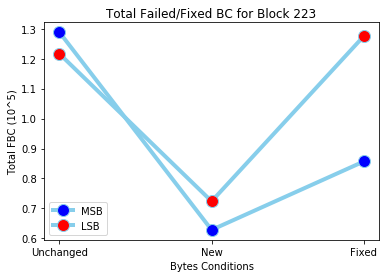

In [30]:
# pages_fixed
# pages_new
# pages_unchanged
n = len(original[:,1])
m = len(original[1,:])
objects = ["Unchanged", "New", "Fixed"]
y_pos = np.arange(len(objects))

all_ = [np.sum(pages_unchanged[1]), np.sum(pages_new[1]), np.sum(pages_fixed[1])]
all_ = [number/100000 for number in all_]
# plt.bar(y_pos, all_, align='center', alpha=0.5)
plt.plot(y_pos, all_, marker='o', markerfacecolor='blue',
         label = "MSB", markersize=12, color='skyblue', linewidth=4)
lsb = [np.sum(pages_unchanged[2]), np.sum(pages_new[2]), np.sum(pages_fixed[2])]
lsb = [number/100000 for number in lsb]
# plt.bar(y_pos, all_, align='center', alpha=0.5)
plt.plot(y_pos, lsb, marker='o', markerfacecolor='red',
         label = "LSB", markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.xticks(y_pos, objects)
plt.ylabel('Total FBC (10^5)')
plt.xlabel('Bytes Conditions')
plt.title("Total Failed/Fixed BC for Block 223")
plt.show()

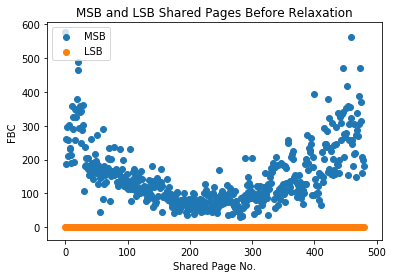

Total of MSB fails 72386.0
Total of LSB fails 0.0


In [22]:
pages_ = pages_new
plt.scatter(pages_[0], pages_[1], label="MSB")
# plt.ylim(0,1300)
plt.xlabel("Shared Page No.")
plt.ylabel("FBC")
plt.title("MSB and LSB Shared Pages Before Relaxation")
# plt.show()
plt.scatter(pages_[0], pages_[2], label="LSB")
plt.legend(loc="upper left")

# plt.legend("MSB","LSB")
# plt.title("LSB Pages")
# plt.ylim(0,1500)
plt.show()

print("Total of MSB fails" ,np.sum(pages_[1]))
print("Total of LSB fails" ,np.sum(pages_[2]))


In [24]:
n = len(original[:,1])
m = len(original[1,:])
    
print(100*(30893.0+30893.0)/(n*m)) # Fixed - MSB LSB
print(100*(96908.0+104938.0)/(n*m)) # New


0.3245368471654475


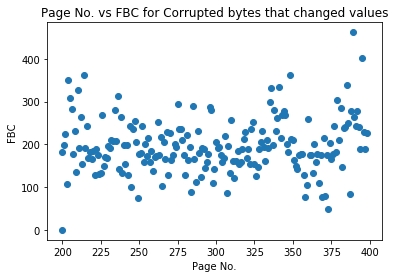

Corruption rate is:  0.21


In [15]:
#  failed bytes that got fixed
def fixed_bytes():
    n = len(original[:,1])
    m = len(original[1,:])
    kk = n-900
    corr = np.zeros((2,200))
    count = 0
    count0 = 0
    k=0
#     for data in datas:
    for i in range(400, 600):
        for j in range(0, m):
            if ((original[i][j] != radiated_data[i][j])
                and (original[i][j] == relaxed_data[i][j])):
#                and (radiated_data[i][j] != relaxed_data[i][j])):
                count += 1
                count0 += 1

        corr[0][k]= k
        corr[1][k] = count
        count = 0
        k+=1
        if(k == 200-1):
            corrp = corr
            plt.figure()
            plt.scatter([num+200 for num in corrp[0]],corrp[1])
            plt.xlabel("Page No.")
            plt.ylabel("FBC")
            plt.title("Page No. vs FBC for Corrupted bytes that changed values")
            plt.show()
#                 k+=1
    print("Corruption rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr

                
fix = fixed_bytes()



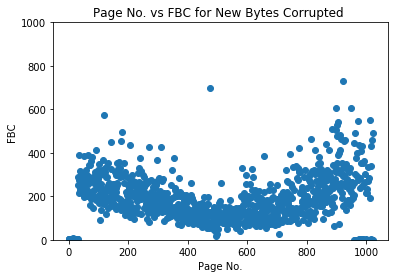

Corruption rate is:  1.0


In [29]:
# New fails in the data 
def new_fails():
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((2,n))
    ms = np.zeros((2,n))
    count = 0
    count0 = 0
#     for data in datas:
    for i in range(0, n):
        for j in range(0, m):
            if ((original[i][j] == radiated_data[i][j]) 
                and (original[i][j] != relaxed_data[i][j])):
#                 print(relaxed_data[i][j], radiated_data[i][j])
                count += 1
                count0 += 1
                

        corr[0][i]= i
        corr[1][i] = count
        count = 0
        if(i == n-1):
            corrp = corr
            plt.figure()
            plt.scatter(corrp[0],corrp[1])
            plt.xlabel("Page No.")
            plt.ylabel("FBC")
            plt.title("Page No. vs FBC for New Bytes Corrupted ")
            plt.ylim(bottom=0, top= 1000)
            plt.show()
#                 k+=1
    print("Corruption rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr

                
new = new_fails()

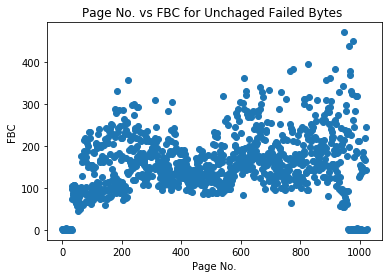

Corruption rate is:  0.85


In [18]:
# Fails that remain the same
def unchanged_fails():
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((2,n))
    count = 0
    count0 = 0
#     for data in datas:
    for i in range(0, n):
        for j in range(0, m):
            if ((original[i][j] != radiated_data[i][j]) 
                and (original[i][j] != relaxed_data[i][j])
               and (radiated_data[i][j] == relaxed_data[i][j])):
                count += 1
                count0 += 1

        corr[0][i]= i
        corr[1][i] = count
        count = 0
        if(i == n-1):
            corrp = corr
            plt.figure()
            plt.scatter(corrp[0],corrp[1])
            plt.xlabel("Page No.")
            plt.ylabel("FBC")
            plt.title("Page No. vs FBC for Unchaged Failed Bytes ")
            plt.show()
#                 k+=1
    print("Corruption rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr

                
unchanged = unchanged_fails()

In [ ]:
# Bits in a byte analysis
def bits_in_byte():
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((2,n))
    count = 0
    count0 = 0
#     for data in datas:
    for i in range(0, n):
        for j in range(0, m):
            if ((original[i][j] != radiated_data[i][j]) 
                and (original[i][j] != relaxed_data[i][j])
               and (radiated_data[i][j] == relaxed_data[i][j])):
                count += 1
                count0 += 1

        corr[0][i]= i
        corr[1][i] = count
        count = 0
        if(i == n-1):
            corrp = corr
            plt.figure()
            plt.scatter(corrp[0],corrp[1])
            plt.xlabel("Page No.")
            plt.ylabel("FBC")
            plt.title("Page No. vs FBC for Unchaged Failed Bytes ")
            plt.show()
#                 k+=1
    print("Corruption rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr

                
unchanged = unchanged_fails()

19038208


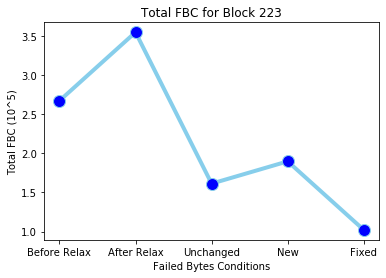

In [19]:
n = len(original[:,1])
m = len(original[1,:])
objects = ["Before Relax","After Relax","Unchanged", "New", "Fixed"]
y_pos = np.arange(len(objects))

all_ = [np.sum(total_before[0]), np.sum(total_before[1]), np.sum(unchanged[1]), np.sum(new[1]), np.sum(fix[1])]
all_ = [number/100000 for number in all_]
# plt.bar(y_pos, all_, align='center', alpha=0.5)
plt.plot(y_pos, all_, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xticks(y_pos, objects)
plt.ylabel('Total FBC (10^5)')
plt.xlabel('Failed Bytes Conditions')
plt.title("Total FBC for Block 223")
plt.show()

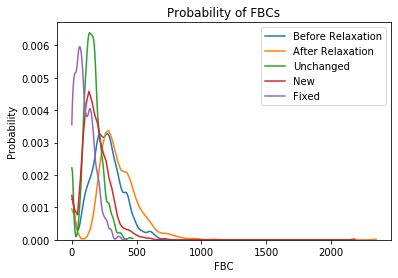

In [21]:
from scipy.interpolate import make_interp_spline, BSpline
import seaborn as sns

fo = [total_before[0], total_before[1], unchanged[1], new[1], fix[1]]
foo = ["Before Relaxation", "After Relaxation", "Unchanged", "New", "Fixed"]

i = 0
for dat in fo:
    T = np.array(fix[0])
    power = np.array(dat)
    xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max

    spl = make_interp_spline(T, power, k=3) #BSpline object
    power_smooth = spl(xnew)
    plt.title("Probability of FBCs")
    plt.xlabel("FBC")
    plt.ylabel("Probability")
#     plt.plot(xnew,power_smooth)
    sns.kdeplot(dat, bw=0.15, label=foo[i])
#     plt.plot(fix[0], dat, markevery=m)
#     plt.show()
    i += 1
plt.show()

In [131]:
def lsb_vs_msb():
    n = len(original[:,1])
    m = len(original[1,:])
    corr = np.zeros((3,n))
    count = 0
    count0 = 0
    lsb, msb = 0,0
#     for data in datas:
    for i in range(0, n):
        for j in range(0, m):
            if ((original[i][j] != radiated_data[i][j]) 
                and (original[i][j] != relaxed_data[i][j])):
                count += 1
                count0 += 1
                if (original[i][j] > radiated_data[i][j]):
                    msb += 1
                else:
                    lsb += 1

        corr[0][i]= i
        corr[1][i] = msb
        corr[2][i] = lsb
        lsb, msb = 0,0
        count = 0
        if 0:#(i == n-1):
            corrp = corr
            plt.figure()
            plt.scatter(corrp[0],corrp[1])
            plt.xlabel("Page No.")
            plt.ylabel("FBC")
            plt.title("Page No. vs FBC for chip ")
            plt.show()
#                 k+=1
    print("Corruption rate is: ", round(100*count0/(n*m),2))
    count0 =0
    return corr


def shift_pages():
    n = len(original[:,1])
    m = len(original[1,:])
    c = list(range(32, 64)) + [num for num in range(65,960) if num % 2 == 1]
    d = [num for num in range(64,1023) if num % 2 == 0]
    lb = len(d) #((n+1)-64)/2
    pages_fail = np.zeros((2,lb))
    fbc = 0
    msbs, lsbs = 0, 0
    ml = np.zeros((2,lb))
    for data in datas:
        for i in range(0,lb):
    #         print(c[i], d[i])
            for j in range(0,m):
                lsb = Convert_Byte_to_Bit(int(original[d[i]][j]))
                msb = Convert_Byte_to_Bit(int(original[c[i]][j]))
                lsb_cor = Convert_Byte_to_Bit(int(data[d[i]][j]))
                msb_cor = Convert_Byte_to_Bit(int(data[c[i]][j]))
                for xx in range(0,len(lsb)):
                    if lsb[xx] != lsb_cor[xx]:
                        lsbs += 1
                    if msb[xx] != msb_cor[xx]:
                        msbs += 1
                    if ((lsb[xx] != lsb_cor[xx]) and (msb[xx] != msb_cor[xx])):
                        fbc += 1

            pages_fail[1][i] = fbc
            pages_fail[0][i] = i
            fbc =0
#         print("Average FBC for LSB and MSB being corrupted together", np.sum(pages_fail[1])/(480))
#         plt.scatter(pages_fail[0], pages_fail[1])
#         plt.title("")
#         plt.xlabel("Page No.")
#         plt.ylabel("FBC")
#         plt.savefig("block_223_unchanged_fails.png")
#         plt.show()
#         print(msbs, lsbs)
    return pages_fail

msbs = lsb_vs_msb()

Corruption rate is:  1.31


In [38]:
'''import seaborn as sns

plt.scatter(msbs[0],msbs[2])
plt.show()
# plt.hist(msbs[1],50, density=True, facecolor='g', alpha=0.75)
# plt.hist(msbs[2],50, density=True, facecolor='g', alpha=0.75)
sns.kdeplot(msbs[1],bw=0.1)
sns.kdeplot(msbs[2],bw=0.1)
plt.show() '''

"import seaborn as sns\n\nplt.scatter(msbs[0],msbs[2])\nplt.show()\n# plt.hist(msbs[1],50, density=True, facecolor='g', alpha=0.75)\n# plt.hist(msbs[2],50, density=True, facecolor='g', alpha=0.75)\nsns.kdeplot(msbs[1],bw=0.1)\nsns.kdeplot(msbs[2],bw=0.1)\nplt.show() "

In [159]:
print("Average FBCs")
fo = [total_before[0], total_before[1], unchanged[1], new[1], fix[1]]
all_ = [np.sum(total_before[0]), np.sum(total_before[1]), np.sum(unchanged[1]), np.sum(new[1]), np.sum(fix[1])]

avgs = [number/len(new) for number in all_]
print(avgs)

Average FBCs
[228707.0, 190448.0, 124922.0, 65526.0, 103785.0]


In [35]:
print(165942/103618)
print(363163 /273251)

1.6014785075952054
1.329045456375274
